#Problema 13 de la guía 9
##S. Schiavinato LU:153/1
###Tests de bondad de ajuste, no paramétricos, entre datos y una distribución normal dada

In [1]:
%matplotlib inline
import numpy as np
import numpy.linalg as lin
import numpy.random as rnd
import scipy.misc as misc
import scipy.optimize as opt
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5 * (1 + np.sqrt(5)) / 2, 5)
plt.rcParams["lines.linewidth"] = 2.5
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["axes.labelsize"] = 20

En la función a continuación se implementa la lógica del test, donde vamos a efectuar un test χ-cuadrado, de Kolmogorov y de Cramer/Von Mises para rechazar (o no) que los datos provengan de la distribución normal dada N(0,2.5). Se grafica el histograma, normalizado de los datos, con bines  entre -7 y 7, con 0.25 de ancho (esto debe verificar que la frecuencia de cada bin sea mayor a 5, como exige el test). A este grafico se le superpone la distribución de la normal. Finalmente para el test de Kolmogorov y Cramer-Von Mises se grafica la acumulativa empírica de los datos (S(x)) y la acumulativa de la normal, para observar gráficamente el test

In [2]:
def G9E13(N = 3000):
    gauss = stats.norm(0, 2.5)
    data = np.loadtxt("datos-G9E13.dat") 
    bins = np.arange(-7,7,0.25)
    data = data[:N]
    
    #plt.axhline(y = 10, c="k",ls="--")
    hist, bins = np.histogram(data, bins = bins);
    yerr = np.sqrt(hist)/(hist.sum()*np.diff(bins))
    histNorm = hist/(hist.sum()*np.diff(bins))
    plt.bar(bins[:-1], histNorm, ecolor = "g", yerr = yerr, width = np.diff(bins))
    plt.plot(bins[:-1], gauss.pdf(bins[:-1]), 'r-')
    chi2 = 0
    for i in range(bins[:-1].shape[0]):
        ni = hist[i]
        fi = N * (stats.norm(0,2.5).cdf(bins[i + 1]) - stats.norm(0,2.5).cdf(bins[i]))
        chi2 += (ni - fi)**2/ni
    
    
    p = 1 - stats.chi2(bins[:-1].shape[0]).cdf(chi2)
    print("χ2 = {}, p = {}".format(chi2, p))

    ##Test de Kolmogorov-Smirnov
    data = np.sort(data) #Ordeno primero
    S = [[data[0], 0]] #Primer punto para la S(Xi)
    for i in range(1, data.shape[0]):
        #print(i)
        if data[i] == data[i-1]:
            S[-1][1] += 1/N  #Si se repite, sumo 1/N más
        else: 
            S.append([data[i], 1.0/N + S[-1][1]]) #Por cada dato, subo un 1/N
    S = np.array(S)

    #Grafico la CDF empirica y la de la gaussiana
    plt.figure(2)
    plt.plot(S[:,0], S[:,1], 'b-', label = "Acumulada de datos")
    plt.plot(S[:,0], gauss.cdf(S[:,0]), 'r-', label = "Acumulada de gaussiana N(0, 2.5)");
    plt.legend(loc = 0)

    #Ahora calculamos 
    D = np.abs(S[:,1] - gauss.cdf(S[:,0])).max()
    print("Dn = {}, Dc = {}".format(D, 0.886/np.sqrt(N)))
    
    #Ahora para calcular Cramer Von Misses
    #integro numéricamente con x ϵ {Xi}
    Cn = np.trapz((S[:,1] - gauss.cdf(S[:,0]))**2 * gauss.pdf(S[:,0]))
    print("Cn = {}, Ccrit = {}".format(Cn, 0.0356))

Habiendo definido el código a ejecutar, se pasa a observar como resuelven los tests para 3000 muestras de la población.  
De la tabla (http://www.jstor.org/stable/2283970) para el test de Kolmogorov observamos que el valor del estadístico debe ser mayor a 0.886*N^(-1/2), para una significacia α = 0.05, si queremos rechazar la hipótesis.  
Mientras, de la tabla (http://www.maths.bath.ac.uk/~jjf23/papers/cramer.pdf) vemos que para el test de Cramer-Von Mises con una significancia α = 0.05 el valor del estadístico debe mayor a 0,03536 para recharzar la hipótesis.  
Por conveniencia, esto ya está incrustado en la lógica del código a ejecutar

χ2 = 66.2664703418, p = 0.14205077506
Dn = 0.0182872088409, Dc = 0.016176072865
Cn = 0.0394112005791, Ccrit = 0.0356


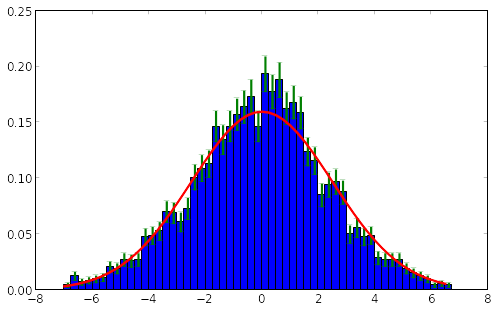

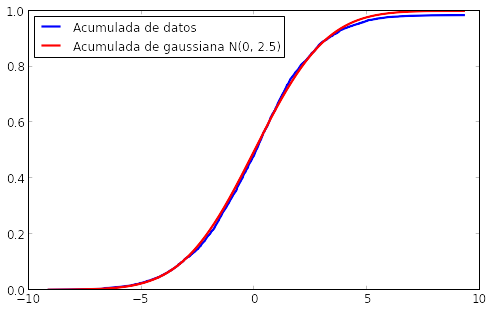

In [3]:
G9E13(N=3000)

Se encuentra que el test de χ-cuadrado no es capaz de de rechazar la hipótesis nula, pero el test de Kolmogorov y de Cramer/Von Mises si, exiguiendo una significacia ɑ=0.05. Ahora para 4000, 5000 y 6000 muestras

χ2 = 81.8409932037, p = 0.0109155027806
Dn = 0.0252424416931, Dc = 0.0140088900345
Cn = 0.0886239279736, Ccrit = 0.0356


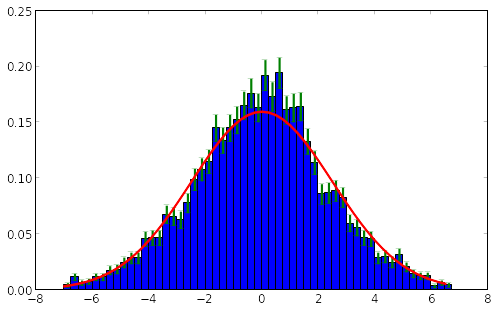

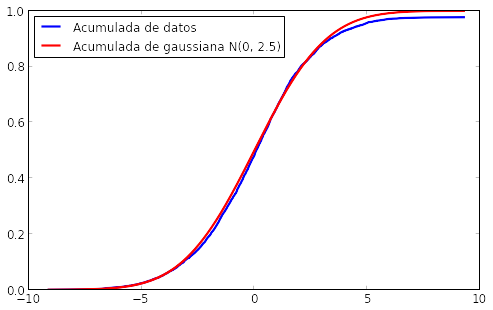

In [4]:
G9E13(N=4000)

χ2 = 94.3167445382, p = 0.000768651074386
Dn = 0.0282424416931, Dc = 0.0125299321626
Cn = 0.17289687093, Ccrit = 0.0356


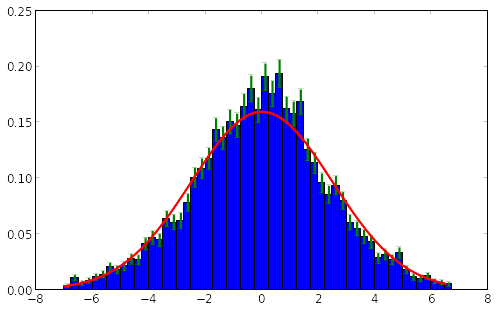

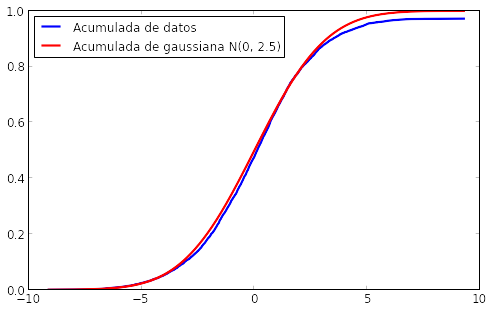

In [5]:
G9E13(N=5000)

χ2 = 114.22165259, p = 4.90634440498e-06
Dn = 0.0351860506076, Dc = 0.0114382108158
Cn = 0.291093793393, Ccrit = 0.0356


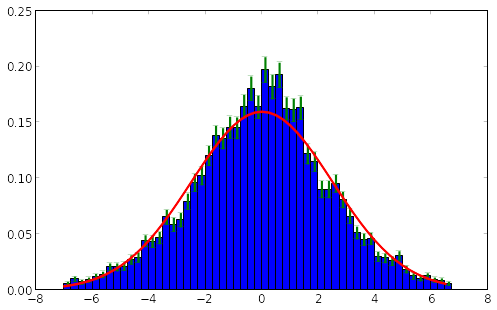

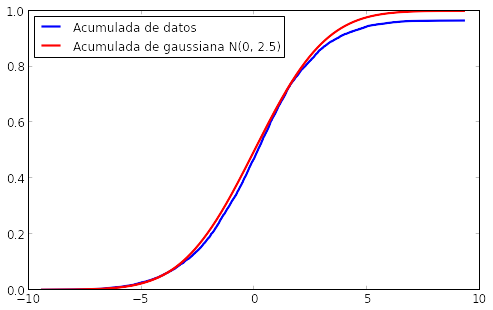

In [6]:
G9E13(N=6000)

Ya con 4000 datos el test de χ-cuadrado es capaz de rechazar la hipótesis nula. Para completar, se grafica la totalidad de los datos, sobrepuesto a la distribución normal propuesta, más una gaussiana con menor varianza y otra con mayor varianza, para observar visualmente la normalidad de los datos

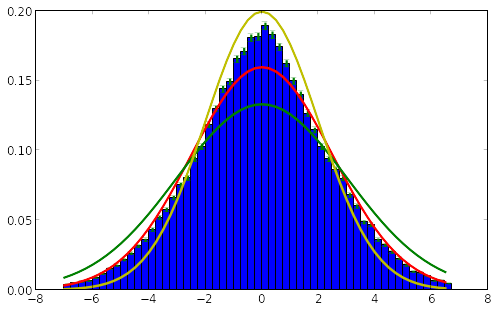

In [7]:
gauss = stats.norm(0, 2.5)
data = np.loadtxt("datos-G9E13.dat") 
bins = np.arange(-7,7,0.25)
#plt.axhline(y = 10, c="k",ls="--")
hist, bins = np.histogram(data, bins = bins);
yerr = np.sqrt(hist)/(hist.sum()*np.diff(bins))
histNorm = hist/(hist.sum()*np.diff(bins))
plt.bar(bins[:-1], histNorm, ecolor = "g", yerr = yerr, width = np.diff(bins));
plt.plot(bins[:-1], stats.norm(0,2.5).pdf(bins[:-1]), 'r-')
plt.plot(bins[:-1], stats.norm(0,3).pdf(bins[:-1]), 'g-')
plt.plot(bins[:-1], stats.norm(0,2).pdf(bins[:-1]), 'y-');

Este gráfico permite visualmente encontrar, sin mucho rigor, que los datos no provienen de una distribución normal, ya que al ajustar de forma acertada el centro de probabilidad de los datos no ajusta a las colas, y lo contrario. Se podría efectuar un test específico para probar la normalidad